# 📊 Stock Analysis: MACD (Moving Average Convergence Divergence)

This notebook explores the **MACD**, a trend-following momentum indicator.  
It shows the relationship between two moving averages of a stock’s price and helps identify **potential buy/sell signals**.


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


## Step 1: Load Historical Data

We'll fetch 6 months of daily price data (default: AMZN).


In [2]:
ticker = yf.Ticker("AMZN")
df = ticker.history(period="6mo")
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-17 00:00:00-04:00,188.220001,188.940002,186.000000,187.529999,25039400,0.0,0.0
2024-10-18 00:00:00-04:00,187.149994,190.740005,186.279999,188.990005,37417700,0.0,0.0
2024-10-21 00:00:00-04:00,188.050003,189.460007,186.399994,189.070007,24639400,0.0,0.0
2024-10-22 00:00:00-04:00,188.350006,191.520004,186.979996,189.699997,29650600,0.0,0.0
2024-10-23 00:00:00-04:00,188.850006,189.160004,183.690002,184.710007,31937100,0.0,0.0


## Step 2: Calculate MACD

- **MACD Line** = 12-day EMA - 26-day EMA  
- **Signal Line** = 9-day EMA of MACD Line  
- **MACD Histogram** = MACD Line - Signal Line


In [3]:
df["EMA12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA26"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA12"] - df["EMA26"]
df["Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["Histogram"] = df["MACD"] - df["Signal"]
df[["Close", "MACD", "Signal", "Histogram"]].tail()


,Close,MACD,Signal,Histogram
Date,,,,
2025-04-10 00:00:00-04:00,181.220001,-7.527244,-7.084391,-0.442853
2025-04-11 00:00:00-04:00,184.869995,-7.021317,-7.071776,0.050459
2025-04-14 00:00:00-04:00,182.119995,-6.764294,-7.010280,0.245986
2025-04-15 00:00:00-04:00,179.589996,-6.687660,-6.945756,0.258096
2025-04-16 00:00:00-04:00,174.330002,-6.971007,-6.950806,-0.020201


## Step 3: Plot the MACD, Signal Line, and Histogram

This visualization shows crossovers and divergence patterns.


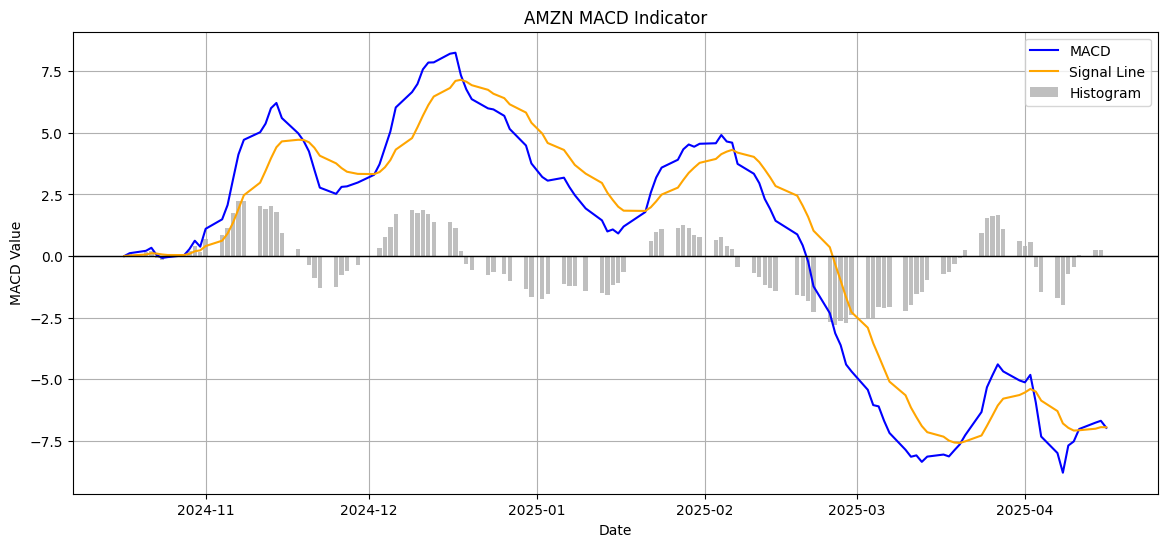

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(df["MACD"], label="MACD", color="blue", linewidth=1.5)
plt.plot(df["Signal"], label="Signal Line", color="orange", linewidth=1.5)
plt.bar(df.index, df["Histogram"], label="Histogram", color="gray", alpha=0.5)
plt.axhline(0, color="black", linewidth=1)
plt.title("AMZN MACD Indicator")
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.legend()
plt.grid(True)
plt.show()


## Step 4: Interpretation

- When **MACD > Signal Line**, it may be a **bullish** signal (momentum up)
- When **MACD < Signal Line**, it may be a **bearish** signal (momentum down)
- Histogram helps visualize momentum strength
- MACD is especially useful during **trending markets**
